# Bike Sharing

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

## Content

- Instant: Record index
- Day: Date
- Season: Season (1:springer, 2:summer, 3:fall, 4:winter)
- Year: Year (0: 2011, 1:2012)
- Month: Month (1 to 12)
- Holiday: weather day is holiday or not (extracted from Holiday Schedule)
- Weekday: Day of the week
- Workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
- Weathersit: (extracted from Freemeteo)
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Temperature: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- Temp2: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- Humidity: Normalized humidity. The values are divided to 100 (max)
- Windspeed: Normalized wind speed. The values are divided to 67 (max)
- Casual: count of casual users
- Registered: count of registered users
- Count: count of total rental bikes including both casual and registered

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
startTimeScript = datetime.now()
df = pd.read_csv("Predict_Count_Regression.csv")
inputFile = 'Predict_Count_Regression.csv'
entireDataset = read_csv(inputFile, na_values="na")

In [3]:
totCol = len(entireDataset.columns)
totAttr = totCol-1

In [4]:
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

In [5]:
entireDataset.head(20)

,Instant,Day,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
print("Number of Rows and Columns in Train Data:", entireDataset.shape)

Number of Rows and Columns in Train Data: (731, 16)


In [7]:
print(entireDataset.dtypes)

Instant          int64
Day             object
Season           int64
Year             int64
Month            int64
Holiday          int64
Weekday          int64
Workingday       int64
Weathersit       int64
Temperature    float64
Temp2          float64
Humidity       float64
Windspeed      float64
Casual           int64
Registered       int64
Count            int64
dtype: object


In [8]:
# 2.a.iv) Statistical summary of all attributes
Statitical_summary = entireDataset.describe()
Statitical_summary

,Instant,Season,Year,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Casual,Registered,Count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
print(entireDataset.isnull().sum())

Instant        0
Day            0
Season         0
Year           0
Month          0
Holiday        0
Weekday        0
Workingday     0
Weathersit     0
Temperature    0
Temp2          0
Humidity       0
Windspeed      0
Casual         0
Registered     0
Count          0
dtype: int64


In [10]:
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [11]:
entireDataset.drop(['Instant','Day', 'Year', 'Casual', 'Registered'],axis=1,inplace=True)

In [12]:
entireDataset.head(2)

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801


## Univariate Analysis

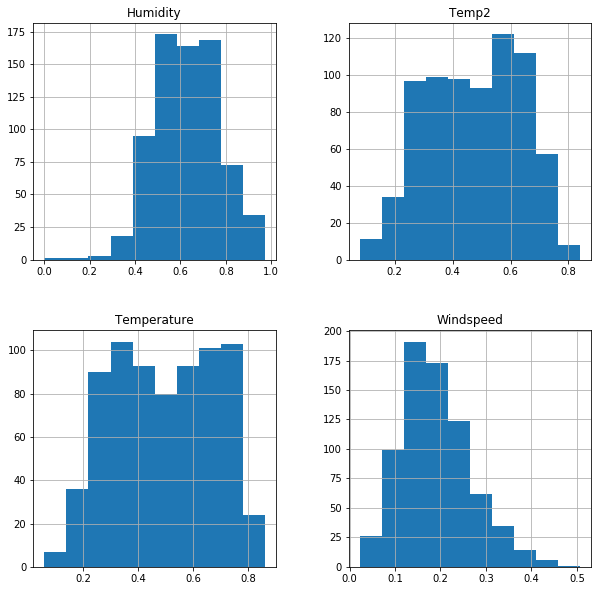

In [13]:
# Histograms for each numberical attribute
df_numeric=entireDataset.select_dtypes(exclude=['object','bool','int'])
df_numeric.hist(figsize=(10,10))
pyplot.show()

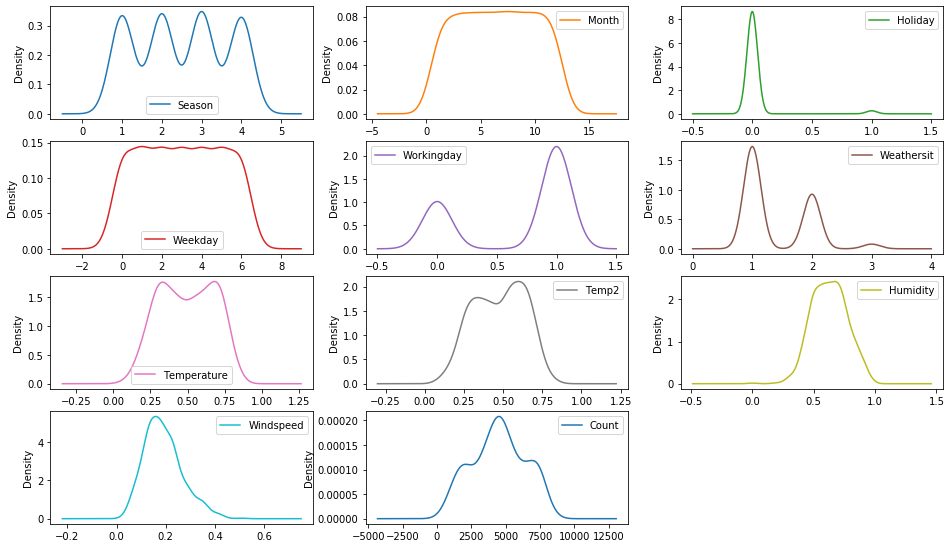

In [14]:
## Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

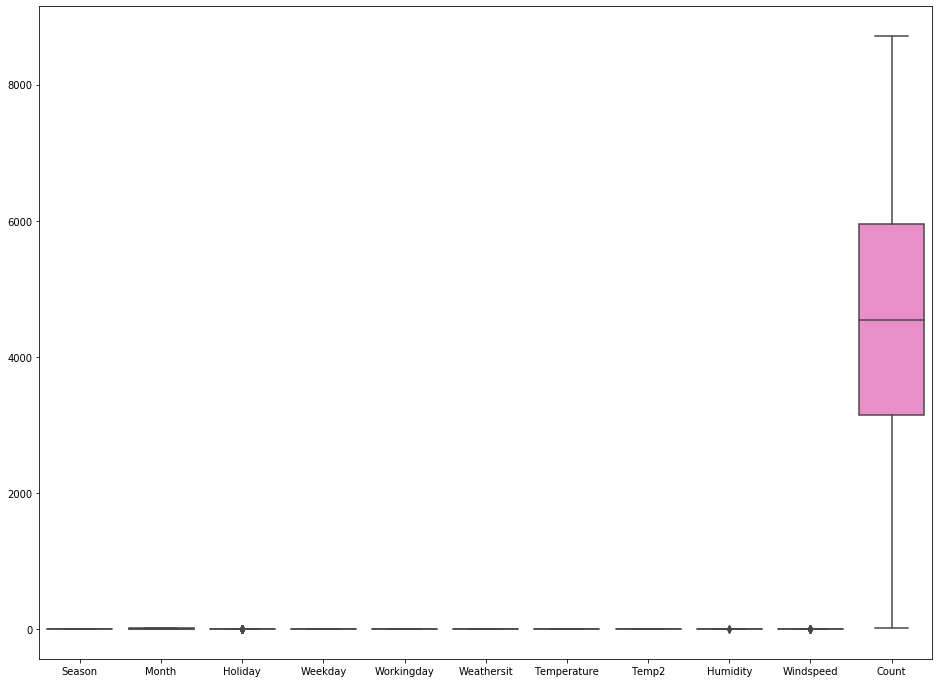

In [15]:
sns.boxplot(data = entireDataset)

## Outliers Detection & Treatment

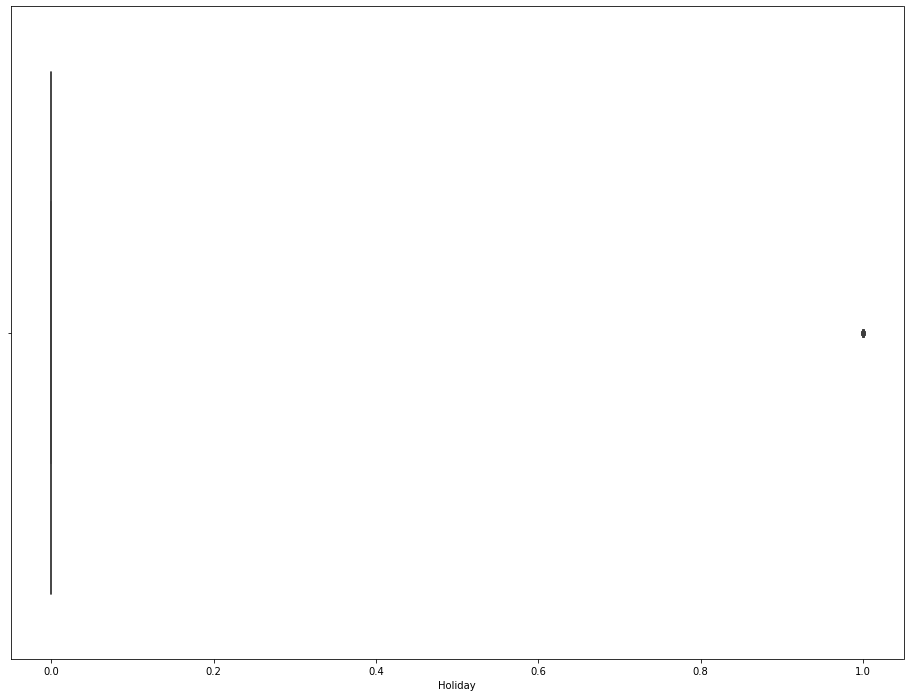

In [16]:
sns.boxplot('Holiday',data = entireDataset)

In [17]:
q1, q3 = np.percentile(entireDataset['Holiday'],[25,75])

In [18]:
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

In [19]:
q1,q3,IQR,LTV,UTV

(0.0, 0.0, 0.0, 0.0, 0.0)

In [20]:
entireDataset['Holiday'] = entireDataset['Holiday'].mask(entireDataset['Holiday']>UTV,UTV)

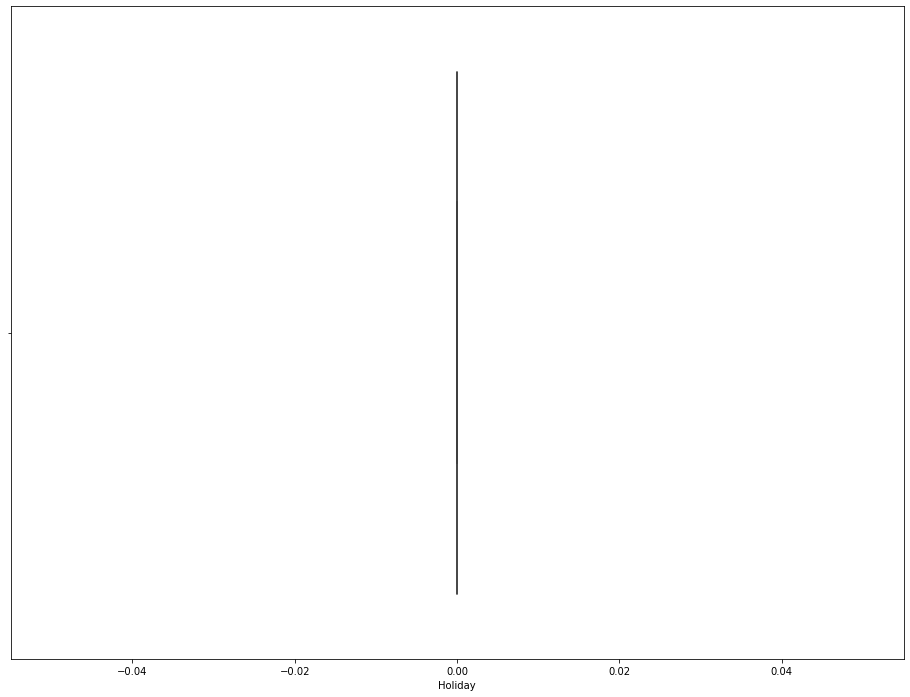

In [21]:
sns.boxplot('Holiday',data = entireDataset)

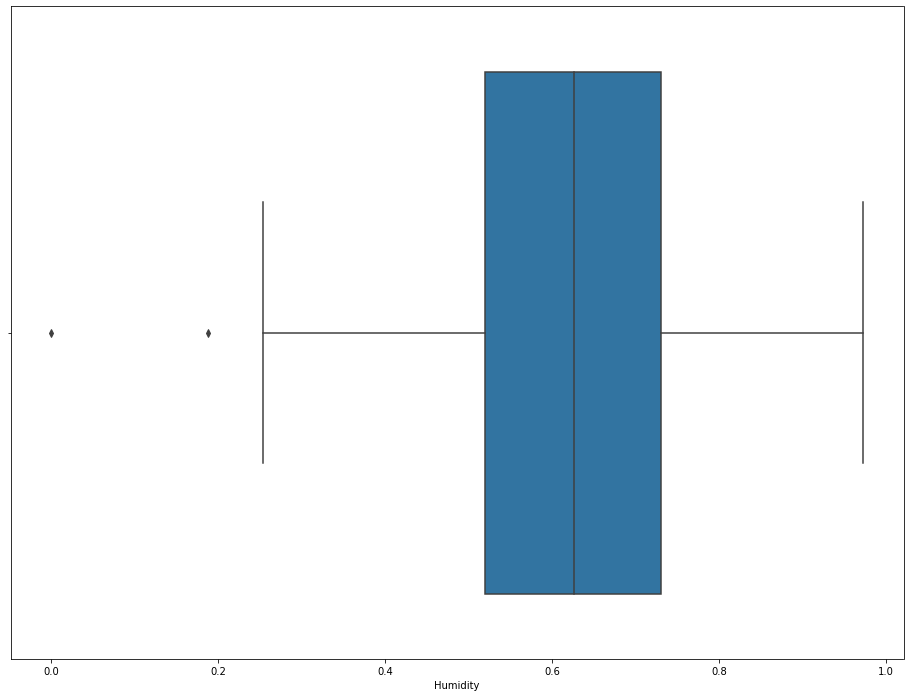

In [22]:
sns.boxplot('Humidity',data = entireDataset)

In [23]:
q1, q3 = np.percentile(entireDataset['Humidity'],[25,75])

In [24]:
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

In [25]:
q1,q3,IQR,LTV,UTV

(0.52, 0.7302085, 0.21020850000000002, 0.20468725, 1.0455212500000002)

In [26]:
entireDataset['Humidity'] = entireDataset['Humidity'].mask(entireDataset['Humidity']<LTV,LTV)

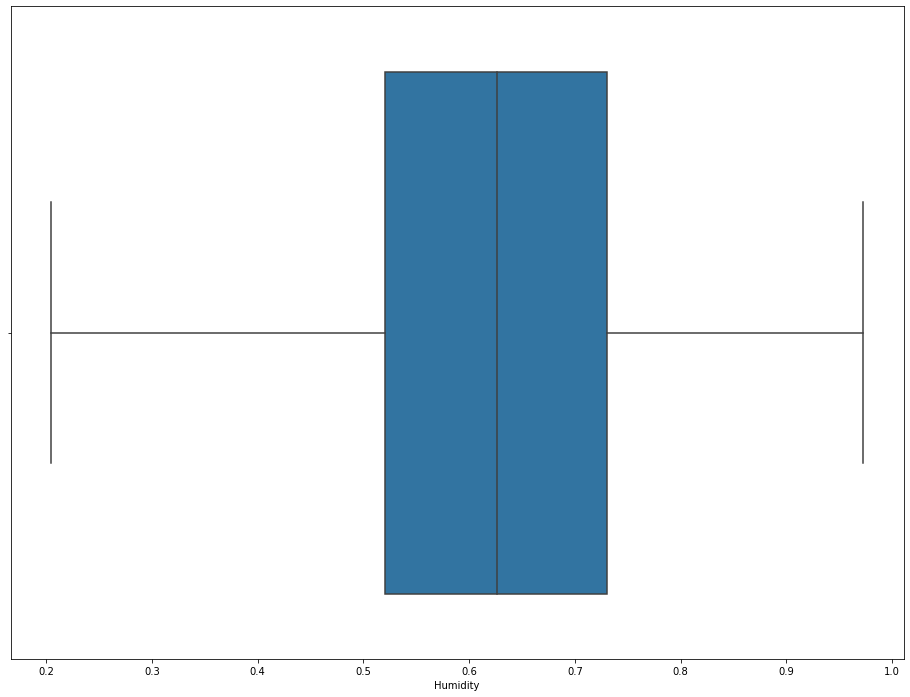

In [27]:
sns.boxplot('Humidity',data = entireDataset)

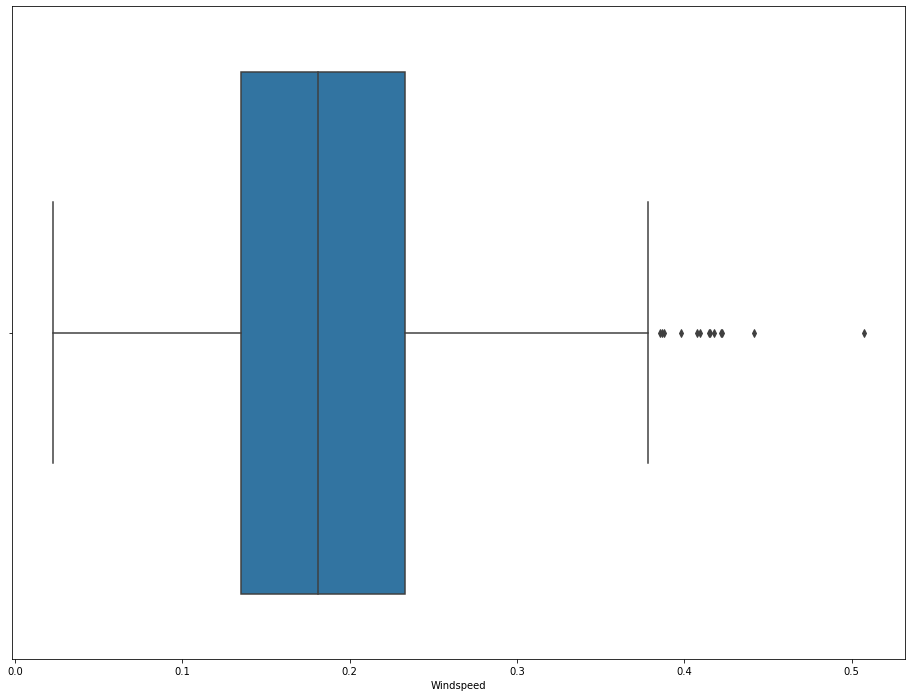

In [28]:
sns.boxplot('Windspeed',data = entireDataset)

In [29]:
q1, q3 = np.percentile(entireDataset['Windspeed'],[25,75])

In [30]:
IQR = q3-q1      
LTV = q1 - 1.5*IQR 
UTV = q3 + 1.5*IQR

In [31]:
q1,q3,IQR,LTV,UTV

(0.13495, 0.2332145, 0.0982645, -0.012446750000000034, 0.38061125)

In [32]:
entireDataset['Windspeed'] = entireDataset['Windspeed'].mask(entireDataset['Windspeed']>UTV,UTV)

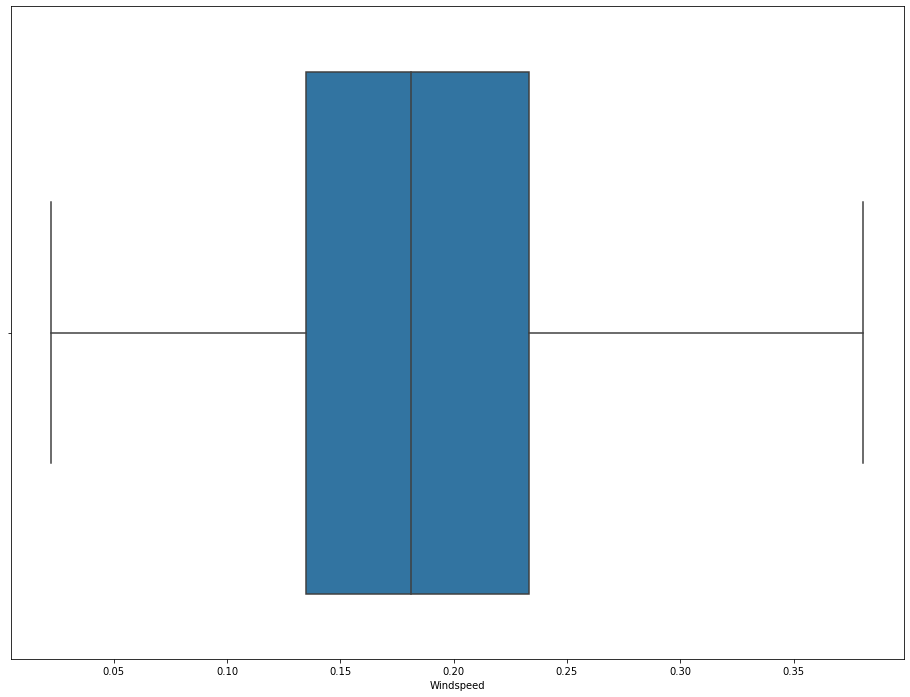

In [33]:
sns.boxplot('Windspeed',data = entireDataset)

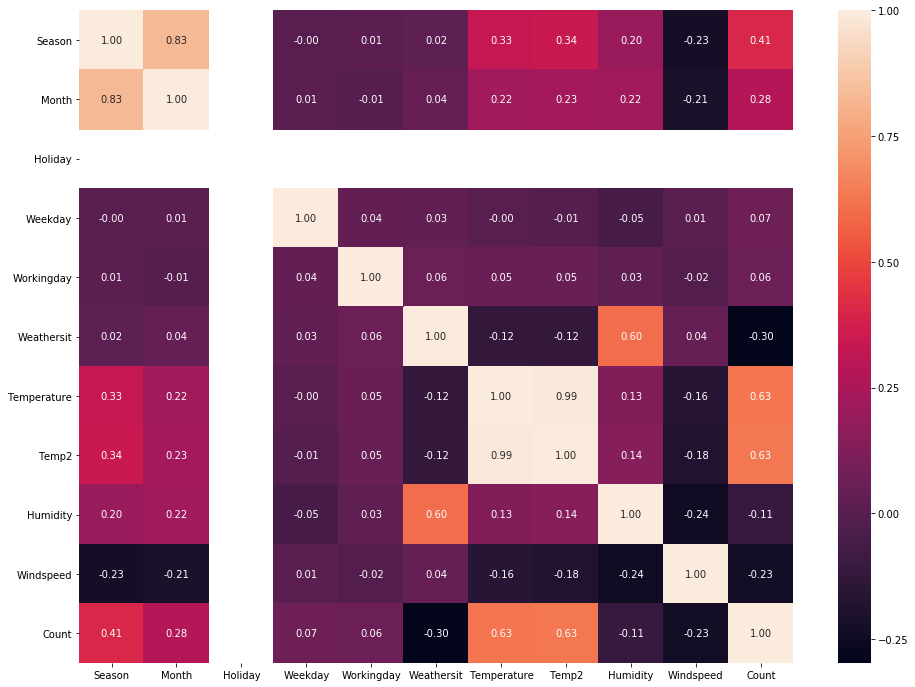

In [34]:
## Correlation matrix
# Calculate correlations
corr = entireDataset.corr()
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

In [35]:
entireDataset.fillna(-1, inplace=True)
entireDataset.head(20)

,Season,Month,Holiday,Weekday,Workingday,Weathersit,Temperature,Temp2,Humidity,Windspeed,Count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


### Converting categorical variables

In [36]:
dummy_fields = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(entireDataset[each], prefix=each, drop_first=False)
    entireDataset = pd.concat([entireDataset, dummies], axis=1)

fields_to_drop = ['Season', 'Weathersit', 'Holiday', 
                  'Weekday']
entireDataset = entireDataset.drop(fields_to_drop, axis=1)
entireDataset.head()

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Count,Season_1,Season_2,Season_3,...,Weathersit_2,Weathersit_3,Holiday_0,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,...,1,0,1,1,0,0,0,0,0,0
2,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [37]:
entireDataset['Cnt'] = entireDataset['Count']

In [38]:
entireDataset.drop(['Count'],axis=1,inplace=True)

In [39]:
entireDataset.rename(columns = {"Cnt": "Count"}, 
                                 inplace = True) 

In [40]:
entireDataset.head(2)

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Season_1,Season_2,Season_3,Season_4,...,Weathersit_3,Holiday_0,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Count
0,1,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,0,1,0,0,0,0,0,0,1,985
1,1,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,0,1,1,0,0,0,0,0,0,801


### Saving entireDataset as a csv file

In [41]:
entireDataset.to_csv('train_test_entireDataset.csv')

In [42]:
seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
#print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))


X_train.shape: (731, 21) Y_train.shape: (731,)
Total time for data handling and visualization: 0:00:13.266160


In [43]:
X_tr = pd.DataFrame(X_train)

In [44]:
X_tr.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.344167,0.363625,0.805833,0.160446,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.363478,0.353739,0.696087,0.248539,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.196364,0.189405,0.437273,0.248309,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.200000,0.212122,0.590435,0.160296,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.226957,0.229270,0.436957,0.186900,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
X_train

array([[ 1.      ,  0.      ,  0.344167, ...,  0.      ,  0.      ,
         1.      ],
       [ 1.      ,  0.      ,  0.363478, ...,  0.      ,  0.      ,
         0.      ],
       [ 1.      ,  1.      ,  0.196364, ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [12.      ,  0.      ,  0.253333, ...,  0.      ,  0.      ,
         1.      ],
       [12.      ,  0.      ,  0.255833, ...,  0.      ,  0.      ,
         0.      ],
       [12.      ,  1.      ,  0.215833, ...,  0.      ,  0.      ,
         0.      ]])

In [46]:
# data standardization
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)

In [47]:
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt
num_folds = 10
scoring = make_scorer(mean_squared_error)

# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)))
models.append(('CART', DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)))

models.append(('KNN', KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)))
models.append(('SVM', SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)))

models.append(('RF', RandomForestRegressor(n_estimators='warn', criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)))

models.append(('AB', AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)))
models.append(('GBM', GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)))
results = []
names = []
metrics = []

prediction = []

In [48]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(mean_squared_error))
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    error = sqrt(cv_results.mean()) #calculate rmse
    #rmse_val.append(error) #store rmse values
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
    print('RMSE value is:', error)

LR: 3061970.079190 (1079921.109241)
Model training time: 0:00:00.035019
RMSE value is: 1749.8485875039626
CART: 4175698.613810 (968764.187836)
Model training time: 0:00:00.146395
RMSE value is: 2043.452620886939
KNN: 3589586.947562 (976716.365693)
Model training time: 0:00:00.110229
RMSE value is: 1894.6205286446263
SVM: 4195180.814228 (3000303.048050)
Model training time: 0:00:00.623624
RMSE value is: 2048.2140547873078
RF: 3556544.226294 (876842.251134)
Model training time: 0:00:00.714343
RMSE value is: 1885.8802258611136
AB: 2727939.182914 (471874.881352)
Model training time: 0:00:01.636857
RMSE value is: 1651.6474148298298
GBM: 3422088.392556 (575254.793253)
Model training time: 0:00:01.419131
RMSE value is: 1849.8887513998525


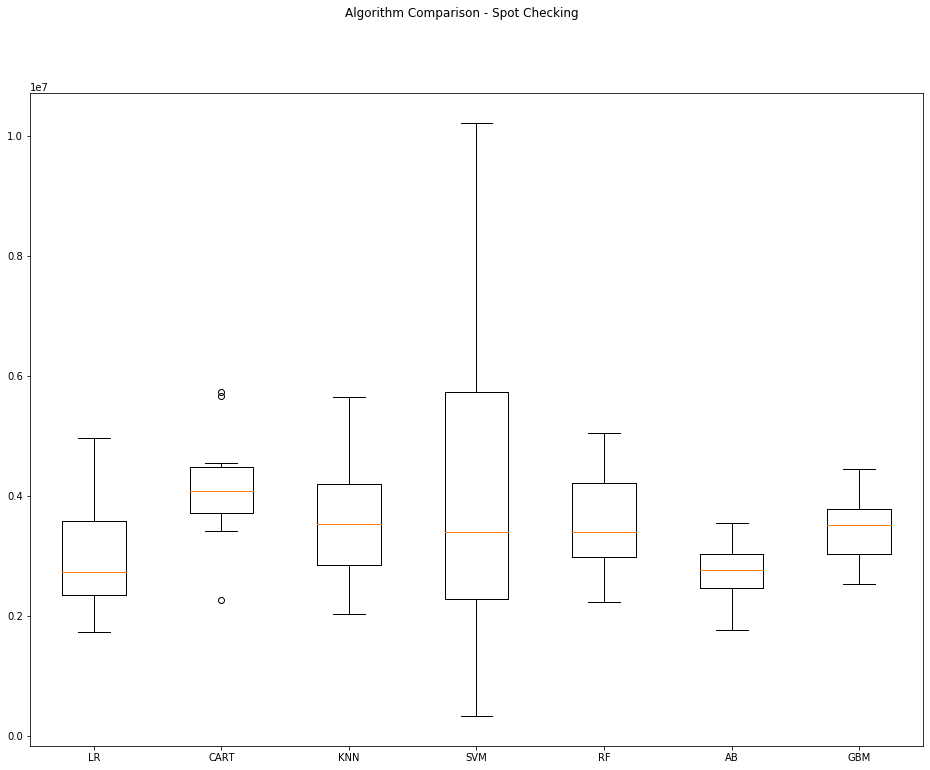

In [49]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [50]:
results = []
names = []

In [51]:
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 3865593.456698 using {'n_estimators': 800}
3741733.109052 (690552.337774) with: {'n_estimators': 400}
3789781.485126 (688448.178987) with: {'n_estimators': 500}
3809665.547373 (678819.504782) with: {'n_estimators': 600}
3846337.894726 (683000.309359) with: {'n_estimators': 700}
3865593.456698 (678241.918417) with: {'n_estimators': 800}
Model training time: 0:00:36.303542


In [53]:
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

/home/curiousgirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 2534260.332872 using {'n_estimators': 800}
2525668.478000 (683631.445983) with: {'n_estimators': 500}
2527408.191658 (697469.804418) with: {'n_estimators': 600}
2530500.412813 (693717.939020) with: {'n_estimators': 700}
2534260.332872 (683325.861496) with: {'n_estimators': 800}
2524842.405452 (694337.868914) with: {'n_estimators': 900}
Model training time: 0:01:04.553869


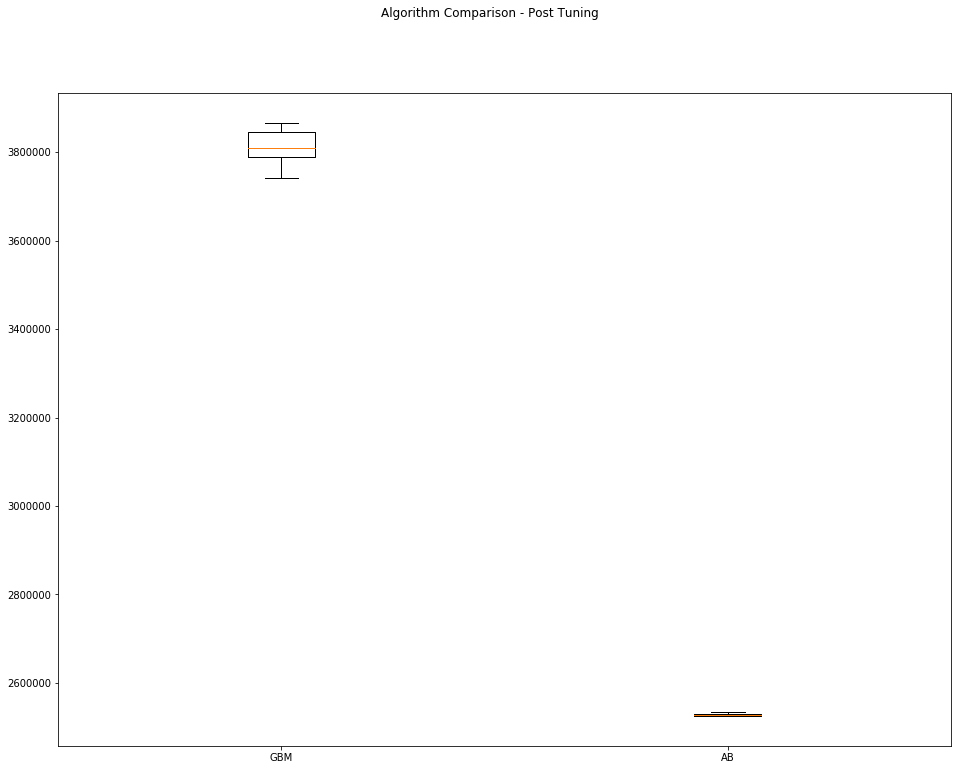

In [55]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [57]:
# R2 score for each algorithms
for name, model in models:
  
    model.fit(X_train, y_train)
    
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)

    from sklearn.metrics import r2_score
    r2_score = r2_score(y_test, y_pred)
    msg = "R2 Score for %s is: %f " % (name, r2_score)
    print(msg)

R2 Score for LR is: 0.603186 
R2 Score for CART is: 0.297717 
R2 Score for KNN is: 0.425417 
R2 Score for SVM is: -0.040499 
R2 Score for RF is: 0.578953 
R2 Score for AB is: 0.599936 
R2 Score for GBM is: 0.640057 


In [58]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
entireDataset.head(2)

,Month,Workingday,Temperature,Temp2,Humidity,Windspeed,Season_1,Season_2,Season_3,Season_4,...,Weathersit_3,Holiday_0,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Count
0,1,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,...,0,1,0,0,0,0,0,0,1,985
1,1,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,...,0,1,1,0,0,0,0,0,0,801


In [60]:
modelName = 'finalModel_BinaryClass.pkl'
dump(model, modelName)
print ('Total time for the script:',(datetime.now() - startTimeScript))
# load the model from disk
loaded_model = load(modelName)
result = loaded_model.score(X_test, y_test)
print(result)
# Define new instace
# define one new instance

Xnew = [[1,0,0.45909,0.363625,1.045521,0.160446,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], int(ynew[0])))

Total time for the script: 0:02:01.707413
0.640056576228055
X=[1, 0, 0.45909, 0.363625, 1.045521, 0.160446, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], Predicted=4948
